## Experiment No. 1

Study of basics of data normalization using any tool


Data Normalization : A preprocessing method that resizes the range of feature values to the specific scale, usually between 0 and 1.


Brings all features to a scale where no any feature will dominate the rest of the others, good practice in data preprocessing, benefitial for model training

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [2]:
df = pd.read_csv("datasets/archive/Salary.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


### Min Max scalar

- It scales values between 0 to 1
- it is sensitive to outliers 
- useful when features have very different range
- also called 0-1 normalization 
- If data have negative values, its range will be -1 to 1

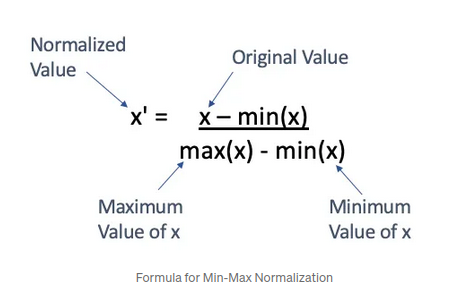

In [5]:
X = df[['YearsExperience']]
y = df['Salary']

In [6]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)

In [7]:
X_minmax.head()

,YearsExperience
0,0.000000
1,0.016129
2,0.032258
3,0.072581
4,0.088710


### StandardScalar

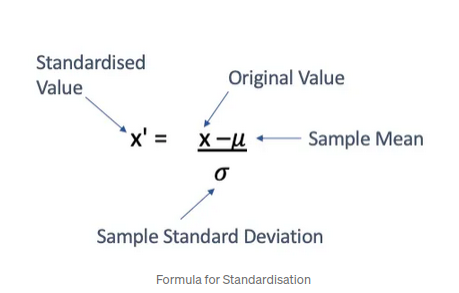

- To get normalized value, it substracts the mean of the sample from the value and then devide it by the standard deviation of the sample
- Mean and std value of the standardized sample is 0 and 1 respectively
- Minimum and maximum values of z-scored transform are not bounded by the boundries

In [8]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

X_standard = pd.DataFrame(X_standard, columns=X.columns)
X_standard.head()

,YearsExperience
0,-1.460399
1,-1.404322
2,-1.348245
3,-1.208053
4,-1.151977


### Robust Scalar

Good in case of outliers


Robust Scalar transforms x to x’ by subtracting each value of features by the median and dividing it by the interquartile range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

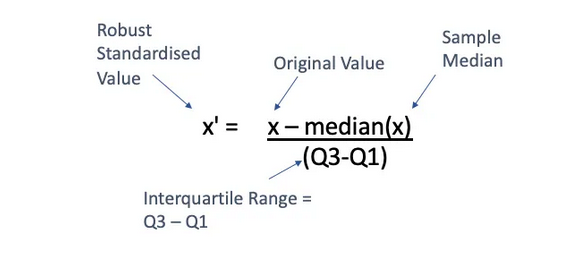

In [9]:
scaler = RobustScaler()
X_robust = scaler.fit_transform(X)

X_robust = pd.DataFrame(X_robust, columns=X.columns)
X_robust.head()

,YearsExperience
0,-0.724138
1,-0.689655
2,-0.655172
3,-0.568966
4,-0.534483


### Unit VEctor Normalization

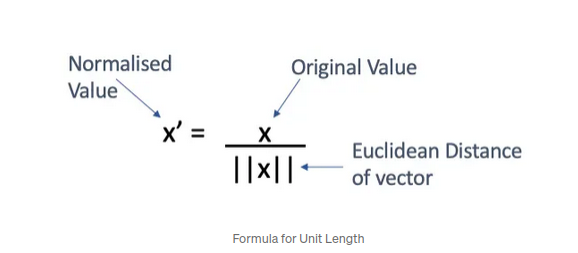

### Lets compare the performance of linear regression with each of the normalization technique

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}
results = {}

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
for name, scaler in scalers.items():
    # Fit on train, transform both train & test
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    r2 = r2_score(y_test, y_pred)

    results[name] = {'R2 Score': r2}

In [14]:
results

{'MinMaxScaler': {'R2 Score': 0.8914234140042778},
 'StandardScaler': {'R2 Score': 0.8914234140042779},
 'RobustScaler': {'R2 Score': 0.891423414004278}}